### Patrones en minería de datos

# Tarea 1: Beer Clustering

### a) Descarga de Dataset: 
Descargado. 

### b) Descripcion del Dataset:

El Dataset está compuesto de 1.048.576 datos descritos por 13 atributos.

#### **Lista de atributos:**

1. **brewery_id:** Identificador de la compañia. <span style="color:green"> **<** int **>** </span>
2. **brewery_name:** Nombre de la compañia. <span style="color:green"> **<** string **>** </span>
3. **review_time:** Hora cuando fue realizada la reseña. <span style="color:green"> **<** int **>** </span>
4. **review_overall:** Nota general al producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
5. **review_aroma:** Nota al aroma del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
6. **review_appearance:** Nota al cuerpo (apariencia) del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
7. **review_profilename:** Nombre del usuario que realizó la reseña. <span style="color:green"> **<** string **>** </span>
8. **beer_style:** Nombre del estilo de la cerveza. <span style="color:green"> **<** string **>** </span>
9. **review_palate:** Nota de sensación al paladar del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
10. **review_taste:** Nota al sabor del producto. <span style="color:green"> **<** int **>** </span> Rango: [0-5]
11. **beer_name:** Nombre de la cerveza. <span style="color:green"> **<** string **>** </span>
12. **beer_abv:** Porcentaje de alcohol por volumen de la cerveza. <span style="color:green"> **<** int **>** </span> Rango: [0-100]
13. **beer_beerid:** Identificador de la cerveza. <span style="color:green"> **<** int **>** </span>


### c) Prueba de algoritmos:

# K-Means

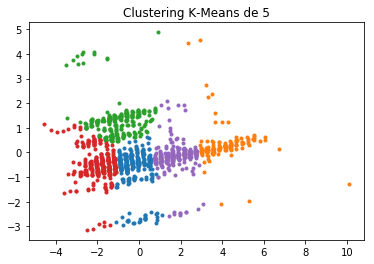

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn

# Normalizador de información mutua
from sklearn.metrics import normalized_mutual_info_score as NMI
# Normalizador
from sklearn.preprocessing import StandardScaler as SS
# Dimensionador
from sklearn.decomposition import PCA 
# Gestionador KMeans 
from sklearn.cluster import KMeans

# Parametros
CSV_PATH = 'prueba.csv'
CLUSTERS = 5
MAX_IT = 10

# Se obtienen los datos del archivo
dataset = pd.read_csv(CSV_PATH)

# Se filtra el dataset por valores numéricos sin contar brewery_time e identificadores
data = pd.DataFrame({'review_overall':    dataset['review_overall'],
                     'review_aroma':      dataset['review_aroma'],
                     'review_appearance': dataset['review_appearance'],
                     'review_palate':     dataset['review_palate'],
                     'review_taste':      dataset['review_taste'],
                     'beer_abv':          dataset['beer_abv']})

# Se arregla el dataset asumiendo 0 == vacio - Error: NaN found
data = data.fillna(0)

# Se normalizan los datos y se disminuye la dimención
data = SS().fit_transform(data)
data = PCA(n_components = 2).fit_transform(data)

# Inicialización de K-Means
k_means = KMeans(init='k-means++', n_clusters=CLUSTERS, n_init=MAX_IT)
k_means.fit(data)

# Asignación de labels
labels = k_means.labels_


for label in np.unique(labels):
    plt.plot(data[labels == label, 0], data[labels == label, 1], '.')

plt.title('Clustering K-Means de ' + str(CLUSTERS))
plt.show()

# K-means (ejemplo)

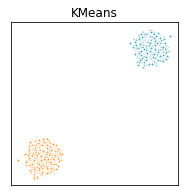

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets.samples_generator import make_blobs
np.random.seed(0)
centers = [[1,1],[-1,-1]]
X, labels_true = make_blobs(n_samples=10000, centers=centers, cluster_std = 0.1)
from sklearn.cluster import KMeans
k_means = KMeans(init="random", n_clusters=2, n_init=10)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
fig = plt.figure(figsize=(3,3))
colors = ['#4EACC5','#FF9C34','#4E9A06']
ax = fig.add_subplot(1,1,1)
ax.set_title('KMeans')
for k, col in zip(range(3), colors):
	my_members = k_means_labels == k
	ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
	
ax.set_xticks(())
ax.set_yticks(())
plt.show()

# Minibacht k-means

# HAC complete (ejemplo)

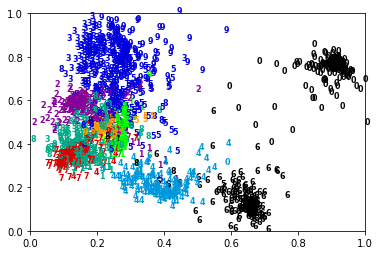

In [4]:
import numpy
import sklearn
import scipy
import matplotlib
from matplotlib import pyplot as plt
from sklearn import datasets
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
from sklearn import manifold
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
from sklearn.cluster import AgglomerativeClustering as hac
clustering = hac(linkage="average", n_clusters=10, affinity="euclidean")
clustering.fit(X)
x_min, x_max = numpy.min(X_red, axis=0), numpy.max(X_red, axis=0)
X_red = (X_red - x_min)/(x_max - x_min)
for i in range(X_red.shape[0]):
	plt.text(X_red[i,0], X_red[i,1], str(y[i]),
	color=plt.cm.spectral(clustering.labels_[i]/10.),
	fontdict={'weight': 'bold', 'size': 8})

plt.show()


# Ward

# DBScan (ejemplo)

/home/felipe/.local/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


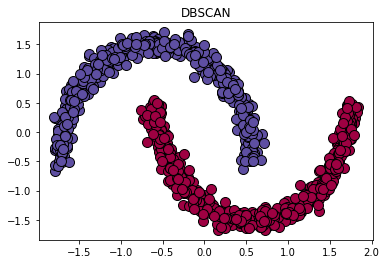

In [5]:
import numpy, scipy
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

noisy_moons = datasets.make_moons(n_samples=1000, noise=.05)
X, y = noisy_moons
X = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
	xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title("DBSCAN")
plt.show()

### c) 